# Logistic Regression
## 개요
다음과 같은 함수를 모델로 사용하는 회귀를 Logistic Regression 이라 한다.

$$\pi(X;\beta) = {1 \over {1+e^-({\beta_0 + \beta X}})} $$

이 때 $Y$ 는 (0, 1) 의 값을 가지기 때문에 일반적으로 Binary Classification (True/False) 문제에 쓰인다.

모델이 확률을 반환하여 특정 값(cut off, 일반적으로 0.5) 이상일 경우 True, 그렇지 않을 경우 False 로 판단 하는 형태로 문제를 해결한다.

## Loss Function
일반적으로는 Maximum Likelihood Function 이라는 다음 함수를 쓴다.

$$ L = \prod_{i=1}^n {\pi(X_i; \beta)^{y_i}(1-\pi(X_i; \beta))^{(1-y_i)}} $$

이 때 $X_i$는 각 요소 값, $y_i \in \{0, 1\}$는 분류를 뜻한다. 위 함수를 최대화 한다는 것은 음을 취한 함수를 최소화 한다는 것과 같다.

일반적으로 Loss function 은 실패를 뜻하기 때문에 최소화 할 수 있는 함수로 정한다. 따라서 원래 함수에 음을 취해 다음과 같이 정의하자.

$$ L = \prod_{i=1}^n -{\pi(X_i; \beta)^{y_i}(1-\pi(X_i; \beta))^{(1-y_i)}} $$

이 때 $L^* = \log L$ 로 정의 하자. 그렇다면 $L$ 을 최소화 하는 문제는 $L^*$을 최소화 하는 문제와 같다. 따라서,
A
$$ L^* = -\sum_{i=1}^n {y_i}\log{\pi(X_i; \beta)} - {(1-y_i)}\log{(1-\pi(X_i; \beta))}$$
$$ {\delta \over {\delta \beta}} L^* = -\sum_{i=1}^n
{y_i}{\delta \pi \over {\delta \beta}}{1 \over \pi} + (1-y_i){\delta \pi \over {\delta \beta}}{1 \over {1-\pi}} $$

이 때,

$$ {\delta \pi \over {\delta \beta}} = {{Xe^{-\beta X}} \over ({{1+e^{-\beta X}}})^2} = X\pi(1-\pi)$$

이므로

$$ {\delta \over {\delta \beta}} L^* = \sum_{i=1}^n X_i{(\pi-y_i)}$$

$X = \begin{bmatrix}X_1 \\ \cdots \\ X_n\end{bmatrix}$, $\pi = \begin{bmatrix}\pi_1 \\ \cdots \\ \pi_n\end{bmatrix}$, $y = \begin{bmatrix}y_1 \\ \cdots \\ y_n\end{bmatrix}$ 이라 하면

$$ {\delta \over {\delta \beta}} L^* = X^T(\pi-y) $$

따라서 Gradient Descent 방법을 이용 할 경우, 초기 $\beta$ 에서 $ \beta \to \beta - \alpha\sum_{i=1}^n X_i{(\pi-y_i)} $ 를 통해 최적화 하면 된다.

## 평가
로지스틱 회귀 모델은 대표적으로 두가지 방법으로 평가 할 수 있다.
1. Accuracy Score

(정답을 맞춘 데이터의 수) / (모든 데이터의 수)

2. 오차 행렬

오차 행렬은 다음과 같다.

$$ \begin{bmatrix}True Negative & False Positive \\ False Negative & True Positive\end{bmatrix} $$

오차 행렬을 통해 정밀도, 재현율 등을 알 수 있다.

## 실습: 위스콘신 유방암 환자 데이터

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # 학습 데이터와 테스트 데이터를 분리 해주는 함수

from sklearn.datasets import load_breast_cancer # 유방암 환자 데이터

In [4]:
cancer = load_breast_cancer()

cancer['data'].shape

(569, 30)

In [5]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# train_test_split
X_tr, X_tst, y_tr, y_tst = train_test_split(df.drop('target', axis=1), df['target'],  test_size=0.3)

X_tr.shape, X_tst.shape

((398, 30), (171, 30))

In [7]:
def standardize(X):
    return (X - X.mean()) / X.std()

def log_model(X, beta):
    return 1 / (1 + np.exp(-X.dot(beta)))

def loss(y, y_hat):
    return -np.sum(y.dot(np.log(y_hat)) + (1 - y).dot(1 - np.log(y_hat)))

def grad(X, y, y_hat):
    return (X.T).dot(y_hat - y)

def acc_score(y, y_hat, cut_off):
    return np.sum(y == (y_hat > cut_off)) / y.shape[0]

In [8]:
X_tr = standardize(X_tr)
X_tst = standardize(X_tst)
X_tr['constant'] = 1
X_tst['constant'] = 1

X_tr, y_tr, X_tst, y_tst = map(lambda data: np.array(data), [X_tr, y_tr, X_tst, y_tst]) # 빠른 연산을 위해 DataFrame 을 ndarray 로 형 변환

X_tr

array([[-0.82839735,  0.10115872, -0.86281781, ..., -0.57747541,
        -0.43857354,  1.        ],
       [ 0.48236793, -0.33761223,  0.52579449, ...,  2.18110754,
         2.07467563,  1.        ],
       [-0.54848033, -0.7831335 , -0.56992563, ..., -0.69825399,
        -1.13495188,  1.        ],
       ...,
       [ 0.52004906,  0.29916818,  0.52190482, ...,  0.30179272,
        -0.12581601,  1.        ],
       [-0.42197937,  0.69518709, -0.45751416, ..., -0.13945173,
        -0.1966793 ,  1.        ],
       [ 1.36249163, -0.270109  ,  1.31150789, ...,  1.08604835,
        -0.34586517,  1.        ]])

In [9]:
beta = np.random.random(31)

y_tst_hat = log_model(X_tst, beta)
initial_accuracy = acc_score(y_tst, y_tst_hat, 0.5)

initial_accuracy

0.2046783625730994

In [11]:
from tqdm import tqdm # progress bar

beta = np.random.random(31)
lr = 0.000001
itr_num = 10000
cut_off = 0.5
avg_loss = []
avg_acc = []
cum_loss, cum_acc = 0, 0

for itr in tqdm(range(1, itr_num + 1)):
    y_hat = log_model(X_tr, beta)
    y_tst_hat = log_model(X_tst, beta)
    l = loss(y_tr, y_hat)
    accuracy = acc_score(y_tst, y_tst_hat, cut_off)
    cum_loss += l
    cum_acc += accuracy
    
    avg_loss.append(cum_loss / itr)
    avg_acc.append(cum_acc / itr)
    
    beta -= lr * grad(X_tr, y_tr, y_hat)
beta

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 5427.20it/s]


array([-0.23956315, -0.24914661,  0.09829648, -0.35515006,  0.29392063,
       -0.54620498,  0.08041946, -0.88439321,  0.17981669,  0.43666745,
        0.1874532 ,  0.40329753, -0.27361581,  0.13877872, -0.17733836,
       -0.38809601,  0.35189017,  0.0374813 ,  0.27342745,  0.02724982,
       -0.59967861, -0.12085556, -0.43929121, -0.17781157, -0.56136121,
       -0.06714486, -0.50870266, -0.57847556, -0.25760083,  0.36794231,
        0.92753323])

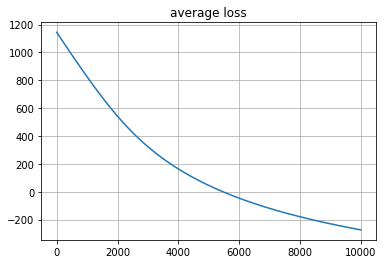

In [12]:
plt.plot(np.arange(itr_num), avg_loss)
plt.title('average loss')
plt.grid()
plt.show()

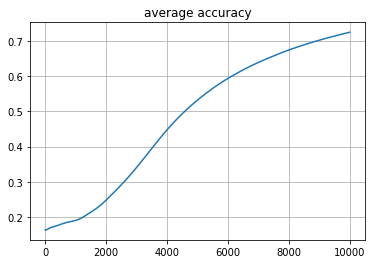

In [13]:
plt.plot(np.arange(itr_num), avg_acc)
plt.title('average accuracy')
plt.grid()
plt.show()

In [14]:
y_tst_hat = log_model(X_tst, beta)
acc_score(y_tst, y_tst_hat, cut_off)

0.9298245614035088

### sklearn 을 통한 로지스틱 회귀 모델 이용

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_tr = X_tr[:, :-1]
X_tst = X_tst[:, :-1]

X_tr.shape

(398, 30)

In [ ]:
model = LogisticRegression()
model.fit(X_tr, y_tr)

model.coef_, model.intercept_

(array([[-0.30040355, -0.12591222, -0.27859202, -0.33756762, -0.0055591 ,
          0.46850546, -0.97078488, -1.18015756,  0.07983681,  0.14939934,
         -1.2832892 ,  0.09356772, -0.65431195, -0.89026452, -0.39004192,
          0.66625917,  0.21121555, -0.22019806,  0.32144958,  0.65257455,
         -0.925635  , -1.29501009, -0.67236821, -0.80317183, -0.44557821,
         -0.01323159, -0.84457247, -0.8285157 , -0.75679725, -0.1978604 ]]),
 array([-0.09588366]))

In [ ]:
y_hat_from_sklearn = model.predict(X_tst)

acc_score(y_tst, y_hat_from_sklearn, 0.5)

0.9883040935672515